<center><h1>Optimisation et atterrissage automatique de fusées</h1></center>

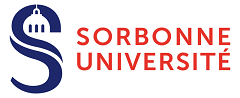

<center><h2>Licence 2 Physique - PAD</h2></center>

<center><h3>Jonathan Kianguebeni - Jîyan Akbay</h3></center>

<center><h4>Année universitaire 2021/2022</h4></center>

# Introduction

Ce travail a pour objectif de répondre à la question de comment optimiser la dépense en carburant d'une fusée devant se poser sur le sol en partant d'une altitude $h_0$ donnée. Evidemment, si le seul objectif est d'économiser du carburant, on peut se contenter de laisser la fusée s'écraser sur le sol, ce qui n'est évidemment pas satisfaisant. Il faut donc imposer une condition supplémentaire : une vitesse maximale. Il s'agit donc de résoudre numériquement un problème physique et mathématique. 

Bien que nous soyons dans un environnement simulé, le problème est physique car la fusée est lâchée dans un environnement reproduisant une approximation de la réalité. Nous nous restreindrons à un degré de liberté, l'altitude, nous prendrons en compte la gravité terrestre et dans certains cas nous prendrons en compte la perte de masse liée à l'éjection de matière par les tuyères de la fusée. Nous ne prendrons pas en compte la traînée de la fusée causée par la résistance de l'air.

Le problème est également mathématique car la réponse concrète à la question de "comment optimiser l'utilisation de carburant" est une fonction : c'est à dire que la réponse à notre question est une fonction $T(t)$, donnant les instants $t_i$ où les boosters de la fusée doivent être allumés pour atteindre l'objectif de ne pas s'écraser et d'économiser du carburant. Cela touche à un domaine compliqué des mathématiques, le calcul des variations. En effet, nous ne cherchons pas à minimiser une fonction mais une fonction de fonctions, c'est à dire une fonctionnelle. Nous cherchons pour nos fusées une trajectoire dans l'espace des phases permettant de minimiser la dépense de carburant, c'est à dire une évolution de la vitesse en fonction de l'altitude permettant de minimiser l'utilisation de la fonction $T$.

Enfin, la résolution du problème sera numérique, car à part dans les cas les plus simples, il n'existe pas de solution analytique au problème. Nous avons pour ce faire choisi un type d'algorithme nous permettant d'explorer l'espace des solutions du problème par force brute : un algorithme génétique. 

Nous entrons maintenant dans la partie étrange de cette présentation, dans laquelle on parle d'objets comme s'il s'agissait d'animaux. En effet, ce type d'algorithmes permet de générer des agents au comportement entièrement déterminé par une liste de poids ou chromosomes générés aléatoirement. Des centaines de fusées au comportement aléatoire seront donc lâchées à la hauteur initiale. Au départ, toutes les fusées se comporteront mal mais certaines se comporteront un peu moins mal que les autres, ce qui se mesurera à l'aide d'une fonction de fitness, permettant d'attribuer un score aux fusées en fonction de leur vitesse d'atterrissage et de leur carburant restant. Les fusées ayant moins mal réussi que les autres seront croisées entre elles, c'est à dire que l'on créera de nouveaux individus disposant de chromosomes des fusées les mieux classées, pour tenter d'obtenir une nouvelle génération de fusées se comportant un peu mieux, et ainsi de suite à chaque essai, jusqu'à obtenir des individus respectant les conditions finales (c'est à dire de ne pas atterrir trop vite) et économisant du carburant.

Il s'agit d'une méthode de machine learning s'apparentant aux réseaux de neurones, à la différence près que l'apprentissage ne se fait pas par descente de gradient mais en copiant les "gènes" des individus les plus performants et que l'on introduit de la diversité dans le comportement en provoquant des "mutations", ou changement aléatoire dans les chromosomes des individus.

Ce type d'algorithmes a un très gros avantage par rapport aux réseaux de neurones classiques, c'est qu'il fonctionne entièrement en white box, nous permettant de suivre en temps réel l'évolution du comportement des fusées et de comprendre ce qu'il se passe. En effet, dans le déroulé de l'algorithme, on voit apparaître aléatoirement les comportements et on peut voir que ceux qui sont plus performants sont transmis à d'autres individus. La seule chose restant difficile pour l'esprit humain est le rôle exact de chaque chromosome pris individuellement. On comprend par contre que l'ensemble des poids nous donne une solution $T(t)$, qui est en réalité une fonction $T(z, \dot{z})$, c'est à dire qu'elle dépend de l'altitude et de la vitesse verticales.

Nous présenterons le modèle physique et l'algorithme génétique utilisé (I), puis nous verrons le code de l'algorithme d'apprentissage (II). Nous verrons enfin les résultats de l'entraînement et la manière dont l'algorithme converge vers une solution optimisant l'utilisation de carburant de nos fusées tout en respectant les conditions finales que l'on leur impose (III).

# I) Modèle

Nous allons dans cette section présenter le modèle que nous avons simulé (I.A). Nous présenterons ensuite de manière générale la méthode algorithmique utilisée pour résoudre le problème (I.B).

## I.A) Modélisation physique du problème

Nous allons dans la présente section présenter le modèle simplifié avec un degré de liberté et sans perte de masse (I.A.1). Nous verrons ensuite le modèle avec perte de masse (I.A.2).

### I.A.1) Modèle simplifié

Nous traitons ici d'un modèle très simplifié de fusée. Celle-ci est ponctuelle, ne perd pas de masse et n'est soumise à aucune trainée.

La fusée n'est soumise qu'à deux forces : la pesanteur $\bar{P} = -m g \hat{z}$ et la poussée $\bar{T} = T\hat{z}$.

Les équations de Newton du modèle sont :

\begin{cases}
    \dot{z} = v_z \\
    \dot{v_z} = \frac{T}{m} - g
\end{cases}

Où $m$ est la masse de la fusée et $T$ est une fonction que contrôlera l'algorithme. La condition nécessaire pour qu'il y ait une solution satisfaisante est que $T > g$, sans quoi la fusée ne pourra jamais que s'écraser.

L'objectif du présent travail est de minimiser la quantité suivante :

\begin{align}
    J = \int^{t_f}_{t_i}T^2 \,dt
\end{align}

Il s'agit de la quantité de poussée utilisée pendant le vol. Autrement dit, on cherche à minimiser l'utilisation de carburant.

Les conditions initiales sont :

\begin{cases}
    z_0 = \left\{20000, 10000, 5000\right\} \textrm{ m} \\
    \dot{z}_0 = 0 \textrm{ m s}^{-1} \\
\end{cases}

Les conditions finales sont :

\begin{cases}
    z_f = 0 \textrm{m} \\
    \dot{z_f} \le 0,1 \textrm{ m s}^{-1}  \\
\end{cases}

Nous avons estimé qu'une vitesse d'atterrissage de $0,1$ m s$^{-1}$ était raisonnable.

Lorsque la fusée ne pousse pas, les fonctions de mouvement de la fusée sont :

\begin{cases}
    \ddot{z}(t) = -g \\
    \dot{z}(t) = -gt + \dot{z}_0  \\
    z(t) = -\frac{g}{2}t^2 + \dot{z}_0t + z_0  \\
\end{cases}

Lorsque la fusée utilise ses boosters, les fonctions de mouvement de la fusée deviennent :

\begin{cases}
    \ddot{z}_B(t) = T - g \\
    \dot{z}_B(t) = (T - g)\,t + \dot{z}_{0B}  \\
    z_B(t) = \frac{T - g}{2}t^2 + \dot{z}_{0B}t + z_{0B}  \\
\end{cases}

Nous proposons une solution minimisant le temps d'atterrissage, nous verrons comment elle se compare avec les solutions obtenues par l'algorithme.

Nous voulons choisir un $t_B$ d'allumage des boosters de manière à ce que $z_B(t) = 0$ soit possible. Mieux, nous voulons qu'il n'y ait qu'une seule solution réelle. Dans le cas où les solutions sont complexes, la fusée  descendrait jusqu'à un point $z_{min} \ge 0$ avant de remonter. Dans le cas où il y a deux solutions réelles, cela veut dire que la fusée s'enfonce dans le sol avant de remonter, ce qui n'est évidemment pas possible dans le monde physique.

En d'autres termes, nous voulons que le discriminant de la fonction $z_B(t)$ soit nul, c'est à dire que :

\begin{align}
    \dot{z}_{OB}^2 - 4 \, \frac{T - g}{2} \, z_{0B} = 0 \\
    \Leftrightarrow z_{0B} = \frac{\dot{z}_{OB}^2}{2\,(T - g)}
\end{align}

Notre programme devra en permanence surveiller l'altitude et la vélocité courantes et lancer les boosters une fois que cette relation sera vérifiée.

Il y a un petit bémol lié à l'erreur de calcul numérique. Il sera en pratique très difficile de trouver l'exact moment où lancer les boosters sans que la fusée ne s'écrase ou bien remonte vers les $\hat{z}$ positifs. Nous devrons donc chercher le moment juste avant que l'altitude limite soit dépassée, lancer les boosters, nous laisser tomber jusqu'à atteindre une vélocité inférieure ou égale à la vélocité max d'atterrissage et ensuite maintenir les boosters avec une accélération égale à $g$ pour que la fusée se contente de finir sa descente à vitesse constante.

### I.A.2) Modèle avec perte de masse

Dans ce cas-ci, la fusée est toujours ponctuelle et n'est soumise à aucune trainée mais elle perd de la masse.

Comme précédemment, la fusée n'est soumise qu'à deux forces mais leur définition change quelque peu : la pesanteur $\bar{P} = -(m_0 + \dot{m} t) g \hat{z}$ et la poussée $\bar{T} = -\dot{m} v_e\hat{z}$.

Où $m_0$ est la masse initiale de la fusée, à savoir la masse à vide à laquelle s'ajoute la quantité de carburant. $\dot{m}$ est la quantité de masse éjectée par seconde. $v_e \le 0$ est la vitesse d'éjection de masse par la fusée. 

Les équations de Newton du modèle sont donc$\,^{1 \, 2}$ :

\begin{cases}
    \dot{z} = v_z \\
    \dot{v_z} = -\frac{\dot{m} v_e}{m_0 + \dot{m} t} - g \\
    \dot{m} = \dot{m}_0
\end{cases}

$T$ est une fonction que contrôlera l'algorithme. La condition nécessaire pour qu'il y ait une solution satisfaisante est que $T > g$, sans quoi la fusée ne pourra jamais que s'écraser.

L'objectif du présent travail est de minimiser la quantité suivante :

\begin{align}
    J = \int^{t_f}_{t_i}T^2 \,dt
\end{align}

Il s'agit de la quantité de poussée utilisée pendant le vol. Autrement dit, on cherche à minimiser l'utilisation de carburant.

Les conditions initiales sont :

\begin{cases}
    z_0 = \left[1960, 2000\right] \textrm{ m} \\
    \dot{z}_0 = 0 \textrm{ m s}^{-1} \\
\end{cases}

$z_0$ est une plage continue qui commence très étroite et s'élargit au fur et à mesure que l'algorithme génétique implémenté apprend. Configurer cet intervalle trop étroit fait que l'algorithme risque de sur-ajuster, auquel cas il sera par exemple capable de poser parfaitement la fusée depuis une hauteur $h$ mais ne fonctionnera plus du tout correctement au moindre changement dans les conditions initiales. Le configurer sur un intervalle trop large l'empêchera complètement de converger.

Les conditions finales, quant à elles, restent :

\begin{cases}
    z_f = 0 \textrm{m} \\
    \dot{z_f} \le 0,1 \textrm{ m s}^{-1}  \\
\end{cases}

C'est à dire les mêmes que dans le cas précédent.

Comme il n'est pas possible d'obtenir analytiquement une solution d'optimisation de ce problème, nous allons le résoudre numériquement à l'aide d'un algorithme génétique. Nous allons donc passer à la résolution numérique du problème.

## I.B) Résolution numérique

Pour tenter de résoudre notre problème et répondre à la problématique nous avons décidé de recourir à une approche aussi intéressante à appliquer qu’à étudier. Notre solution repose sur deux concepts développés dans le domaine des sciences de l’informatique qui sont :
- Les réseaux de neurones artificiels (I.B.1)
- Les algorithmes génétiques (I.B.2)

### I.B.1) Les réseaux de neurones artificiels

Ils font partie de cette famille d’algorithmes ayant pour intention de doter des ordinateurs d’une capacité d’apprentissage.
Les réseaux de neurones artificiels sont nés en 1943 d’un  neurophysiologiste, Warren McCulloch et d’un mathématicien, Walter Pitts. 
Ils présentent les fondements d’une approche cherchant à mimer la biologie humaine et plus particulièrement la façon dont les neurones humains interagissent chez un animal tel que l’homme. 
Une représentation répandue et toujours présentée pour leurs études est celle du Perceptron :

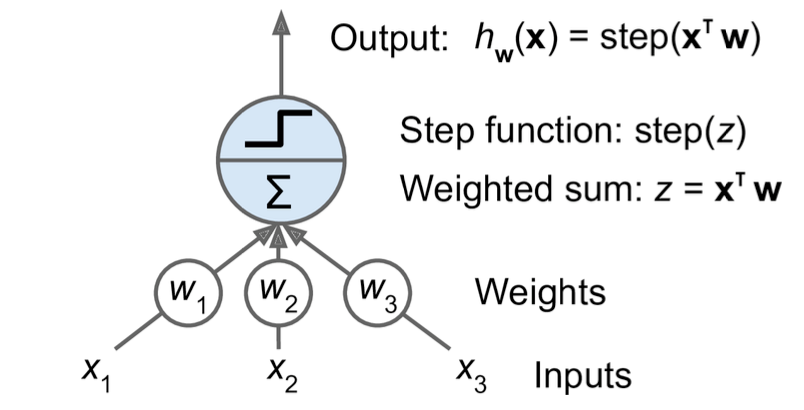

Il s’agit ici d’une des architectures les plus simplifiées d’ANN que l’ont doit à Franck Rossenblatt (1957).

L’objectif ici est de trouver ou plutôt de prédire une valeur d’intérêt. Dans le monde réel, cela peut être assimilé à l’estimation du prix d’une maison ou si une voiture doit s’arrêter à un feu ou pas.

Toute ces décisions peuvent être réduites à une valeur numérique : le prix pour la maison et une valeur supérieure à un certain seuil pour savoir si la voiture doit s’arrêter par exemple. 

Une telle décision se fera en se basant sur ce qu’on nommera par la suite des inputs soit des variables permettant de caractériser un problème et à partir desquelles notre algorithme devrait être en mesure de faire une prédiction.

Un exemple simplifié de l’image présenté sous forme d’équation peut être donnée ainsi:

\begin{align}
    z=\sum w_i \, x_i + b \\
    y = \textrm{sigmoid}(z)
\end{align}

Avec sigmoid$(z) = \frac{1}{1+e^{-z}}$, la fonction d'activation. Le choix d'une fonction sigmoïde sera expliqué par la suite. $b$ correspond au biais. $y$ est la valeur prédite à l'aide du modèle. Les $w_i$ sont les poids associés à chaque input $x_i$, que l’on peut voir comme la magnitude ou l’importance de cette input, relativement au noeud dont on cherche à faire la somme. Les inputs qui peuvent être le nombre de chambres ou les coordonnées géographiques si on s’intéresse au prix d’un appartement, par exemple.

Les réseaux sont un outil versatile appliqués aussi bien dans la reconnaissance d’image via les CNN (convolutional neural network) ou le dialogue humain IA. Le nombre de paramètres peut varier considérablement comparé à ce que l’on a pu voir jusqu’ici, avec des réseaux de neurones de plusieurs dizaines de milliards de paramètres ou poids et pouvant s’appliquer à de nombreux problèmes.

Comme il en est question dans notre introduction nous cherchons à assister l’atterrissage d’une fusée de façon automatisée. Pour cela nous emploierons un réseau de neurones dont le but sera, à chaque itération de la boucle du jeu, de prédire si la fusée doit allumer ses boosters ou les éteindre, avec pour objectif d’obtenir une intelligence artificielle capable de faire atterrir une fusée sans intervention humaine, du moins dans notre simulation.

Une illustration du modèle que nous avons construit est la suivante :

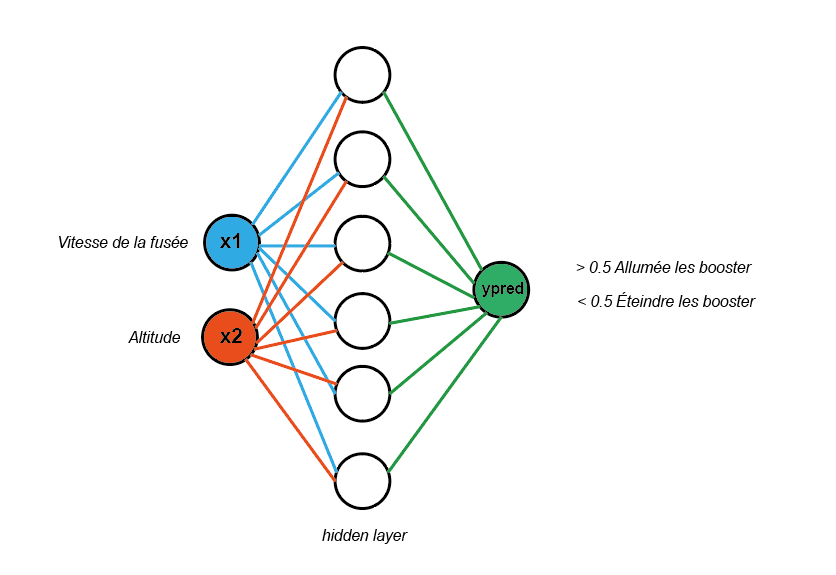

Il est à noter que l'on parle de « Deep Neural Network » ou réseau de neurones profond lorsque notre structure comporte une ou plusieurs de ce que l’on appelle une couche cachée, ou « hidden layer », cela y compris lorsque le réseau considéré est « shallow » comme celui-ci et qu’il ne contient qu’une couche cachée avec peu de neurones.

Le choix d’une sigmoïde est la réponse à deux réflexions :
-Ce type d’algorithme traite mieux avec des données ramenées à une amplitude faible, c'est à dire lorsque les input varient peu.
-La sigmoïde nous permet d’obtenir une valeur comprise entre 0 et 1, parfaite pour notre problème binaire à savoir « allumer » « éteindre » les boosters.

Nous sommes arrivés ici à créer un modèle qui permettra à notre fusée de décider ce qu’elle doit faire à chaque itération. Il reste maintenant à discuter de la façon dont elle va être entraînée.

### I.B.2) Les algorithmes génétiques

Nous avons précédemment présenté le modèle sur laquelle notre fusée prendra ses décisions, il convient maintenant de lui fournir un moyen d’itérer et d’ajuster ses « poids » afin de s’améliorer à chaque itération et de produire un modèle réellement capable de prendre des décisions de manière autonome. Pour cela, nous allons recourir à un autre concept emprunté aux sciences de l’informatique.

Avant d’entrer dans le vif du sujet faisons un tour des lieux : 
-Notre programme dispose d’une fusée et des moyen nécessaire pour activer ou désactiver ses boosters
-Le jeu est inséré à l’intérieur d’une boucle qui chaque itération applique les équations physiques qui régissent le déplacement de la fusée, ce qui nous permet également d’apporter en entrée à notre modèle des informations sur l’état actuel de la fusée, à savoir sa vitesse et sa position.
	
Les algorithmes génétiques, tout comme les réseaux de neurones s’inspirent de la biologie et plus précisément de la sélection naturelle, cela en faisant intervenir trois opérations :
- croisement (crossover)
- mutation
- sélection

Pour expliquer plus en amont le fonctionnement nous allons définir quelques termes communément employés pour ce type d’algorithmes.

Nous considérons ici une **population** qui correspond dans notre cas à un ensemble de fusées (100, admettons). Chaque **organisme** de cette population se voit pourvu d’un réseau de neurones, celui présenté à la fin de la partie précédente, dont les poids vont constituer le **phénotype** ou plus précisément son **ADN**. La première population ou « **première génération** » considérée est constituée d’individus dont les poids sont générés aléatoirement avec des valeurs comprises entre -1 et 1. Ce choix d’intervalle s’explique par la nature du fonctionnement des réseaux de neurones, qui convergent plus aisément et rapidement vers une solution quand la magnitude de l’écart entre chaque input et relativement stable, d’où la profusion d’exemples employant des techniques de normalisation des données en machine learning. Il est également raisonnable d’appliquer ce raisonnement en ce qui concerne les poids de notre modèle. 

À partir de cette population de départ, nous pouvons commencer l’entraînement et la résolution de notre problème.

#### Initialisation

Chaque « passe » ou phase d’entraînement consiste à la mise en condition de notre population : 
	
- Toutes les fusées sont lâchées d’une altitude de 5000 mètres avec comme autre condition initiale une vitesse nulle et d’un carburant fixé à $1200000$ tonnes.
	
- À chaque tour de boucle, la vitesse de chaque fusée ainsi que son altitude sont calculées, afin d’en garder trace mais également pour appliquer les équations de la physique qui régit le déplacement de ces fusées.
	
- À chaque tour de boucle chacune des fusées doit prédire, compte tenu de sa vitesse et de son altitude, si la bonne action à réaliser est d’allumer ses booster ou de les éteindre.
 	
- Une fusée est considéré « morte » ou ayant terminé sa « course » si :
	- Elle a dépensé tout son carburant.
	- Elle est partie trop loin dans le mauvais sens.
	- Elle est arrivée à une altitude de 0.
	
- La simulation pour cette population prend fin lorsques toute les fusées sont mortes ou ont fini par arriver à une altitude de 0 mètre.
	
- Lorsqu’une fusée « meurt » ou finit sa « course » nous préservons :
	- Sa distance à l'objectif, ou altitude. 
	- Le carburant restant.
	- Sa vitesse finale (celle qu’elle a lorsque qu’elle meurt ou atterrit).

#### Calcul du fitness

Après une mise à l’épreuve de nos fusées, nous devons maintenant récolter les données obtenues, afin de faire une analyse de la performance des membres de la génération étudiée. Car en effet, nous devons disposer d’un moyen de faire « comprendre » à notre modèle ce que nous voulons, à savoir : 
- Atterrir, ce qui n’est pas intuitif en tant que tel pour un ordinateur
- Atterrir à une vitesse proche de zéro
- Pénaliser les fusées qui partent dans la mauvaise direction
- Pénaliser les fusées à court de carburant et avec une altitude supérieure à 0 

Pour cela nous emploierons une fonction qui permettra selon ces critères d’évaluer et de comparer la performance de chacune de nos fusées. Cette fonction sera maximisée si la fusée respecte un maximum d’entre elles. 

Le terme souvent employé pour cette fonction à maximiser est le **fitness**, encore emprunté au vocabulaire de la biologie. Cette fonction est un élément central de notre algorithme et de l’entraînement, car il s’agit de la fonction que notre modèle va chercher à maximiser, optimisant par la réponse à notre problème.

Nos contraintes étant données nous pouvons esquisser à titre de d’exemple l’apparence de cette fonction :
\begin{align}
    \textrm{fitness} = \frac{1}{v_f + d_{sol}}
\end{align}
Nous voyons ici apparaître la vitesse finale, $v_f$ et la disance au sol $d_{sol}$. Plus celles-ci seront proches de $0$, plus la fusée aura un score élevé. C’est bien ce que nous voulons, à savoir une fusée qui n’arrive pas à $400$ km/h sur le sol, ce qui serait dommageable. Le même raisonnement s’applique pour la distance : nous ne voulons pas d’une fusée épuisant tout son carburant en vol et qui s’écrase.

Si les conditions d'altitude finale nulle et de vitesse finale faible sont respectées, le fitness devient :
\begin{align}
    \textrm{fitness} = m_r
\end{align}
Où $m_r$ est la masse de carburant restant. L'algorithme cherche donc en premier lieu à atterrir correctement, et ensuite à minimiser sa consommation de carburant.

À partir de cette information nous allons maintenant pouvoir passer au cœur du fonctionnement de l’algorithme soit la création d’une nouvelle génération.

#### Sélection

Cette opération peut être résumée par une phrase connue que l’on doit à Darwin : « Survival of the fittest » autrement dit, « la survie du plus adapté ». Il s’agit ici de préserver les membres de la population ayant le mieux répondu à nos contraintes durant la simulation, et par conséquent ayant obtenu le score plus élevé. Ce nombre peut varier en fonction de la taille de la population par exemple. 

Ce qu’il faut retenir, c’est que le choix du nombre de représentants d’une population, comme beaucoup d’autres paramètres d’algorithmes de Machine Learning, est l’objet de ce que l’on appelle en data science le **fine-tuning**, soit le procédé qui consiste à sélectionner des paramètres permettant au mieux de répondre à la problématique en produisant un modèle offrant les meilleures performances possibles.

Dans cette étape nous avons choisi de sélectionner les 20 meilleurs représentants de la génération en cours afin de préserver leur **patrimoine génétique**. Rappelons-le : nous valorisons les fusées disposant des poids $w_i$ qui leur ont permis de répondre au mieux aux exigences de notre problème à savoir atterrir avec une vitesse minimum et avec un maximum de carburant possible.

À partir de ce sous « pool » de fusées, nous pouvons commencer à créer une nouvelle population qui sera amenée à être l’objet d’une nouvelle simulation dans les mêmes conditions. 

Ce qui nous amène au croisement, le crossover.

#### Croisement

Il s’agit ici d’effectuer une opération analogue à la reproduction en milieu naturel, où les plus adaptés ont survécu et vont servir de références pour créer une progéniture qui viendra faire « évoluer » leur population dans l’intention (pour nous, pas dans la vraie nature) d’obtenir de meilleurs résultats.

Notre algorithme fonctionne de façon simple. Il consister à itérer à travers les poids des parents et à sélectionner aléatoirement le poids de l’un ou l’autre des parents. 

Il est à noter que la proximité avec la biologie de ce procédé se retrouve lorsque l’ADN d’un nouvel individu est construit à partir de celui de ses deux parents (via leurs chromosomes notamment). Il est particulièrement « beau » dans son approche, malgré la simplicité de sa représentation dans notre cas.

#### Mutation

Si la reproduction permet de préserver des compétences et attributs acquis par une espèce, la diversité d’espèces présentes sur notre planète n’aurait aucune chance d’exister sans les mutations, ces petites variations du patrimoine génétique qui sont à l’origine des plus grands bouleversements du monde biologique. 

Il existe trois grandes catégories d’organismes cellulaires sur notre planète :
	
- Les archea
- Les bactéries 
- Les eucaryotes (dont nous faisons partie)

Il existe un courant de pensée ayant émis l’hypothèse étayée que la plus simple de ces familles serait à l’origine des deux autres, au travers du mécanisme (non le seul) qui nous intéresse ici : les mutations. 

Ce sont généralement des phénomènes aléatoires mais pas toujours. Par exemple, fumer provoque le type de mutation dont il est question sur notre ADN. Dans une mesure beaucoup plus manifeste, les radiations provoquent aussi des mutations de l’ADN. 

Par un jeu de d’essais et d’erreurs, ces mutations ont permis d’aider de nombreux organismes à découvrir de nouvelles capacités qui leurs ont permis de mieux s’approprier leurs environnements, voire d’en créer de nouveaux.

En biologie il s’agit de changer une lettre A, C, G, T ou toute une série qui peuvent conduire à l’inactivation d’un gène ou à la création d’un nouveau. Dans notre cas, il s’agit d’introduire de petites variations aux poids des modèles de notre progéniture et des parents les plus adaptés afin de se prémunir de plusieurs problèmes rencontrés avec ce type de modèles que sont les réseaux de neurones :
	
- Convergence rapide/prématurée vers un minimum local et une solution sous optimale
- Stagnation de la population de génération en génération/pas d’amélioration du fitness

À noter qu’il existe d’autres moyens d’introduire des mutations au sein d’une population pour ce type d’algorithme. Une de ces approches consiste non pas à faire varier sensiblement les poids de nos individus mais à modifier la structure même de leur modèle en rajoutant des neurones au réseau cela aléatoirement. Un autre moyen encore, consiste à ajouter des connexions (aléatoires également) entre différents neurones, un qui relierait directement un des inputs à l’output. Ces deux approches ont été représentées ci-dessous :

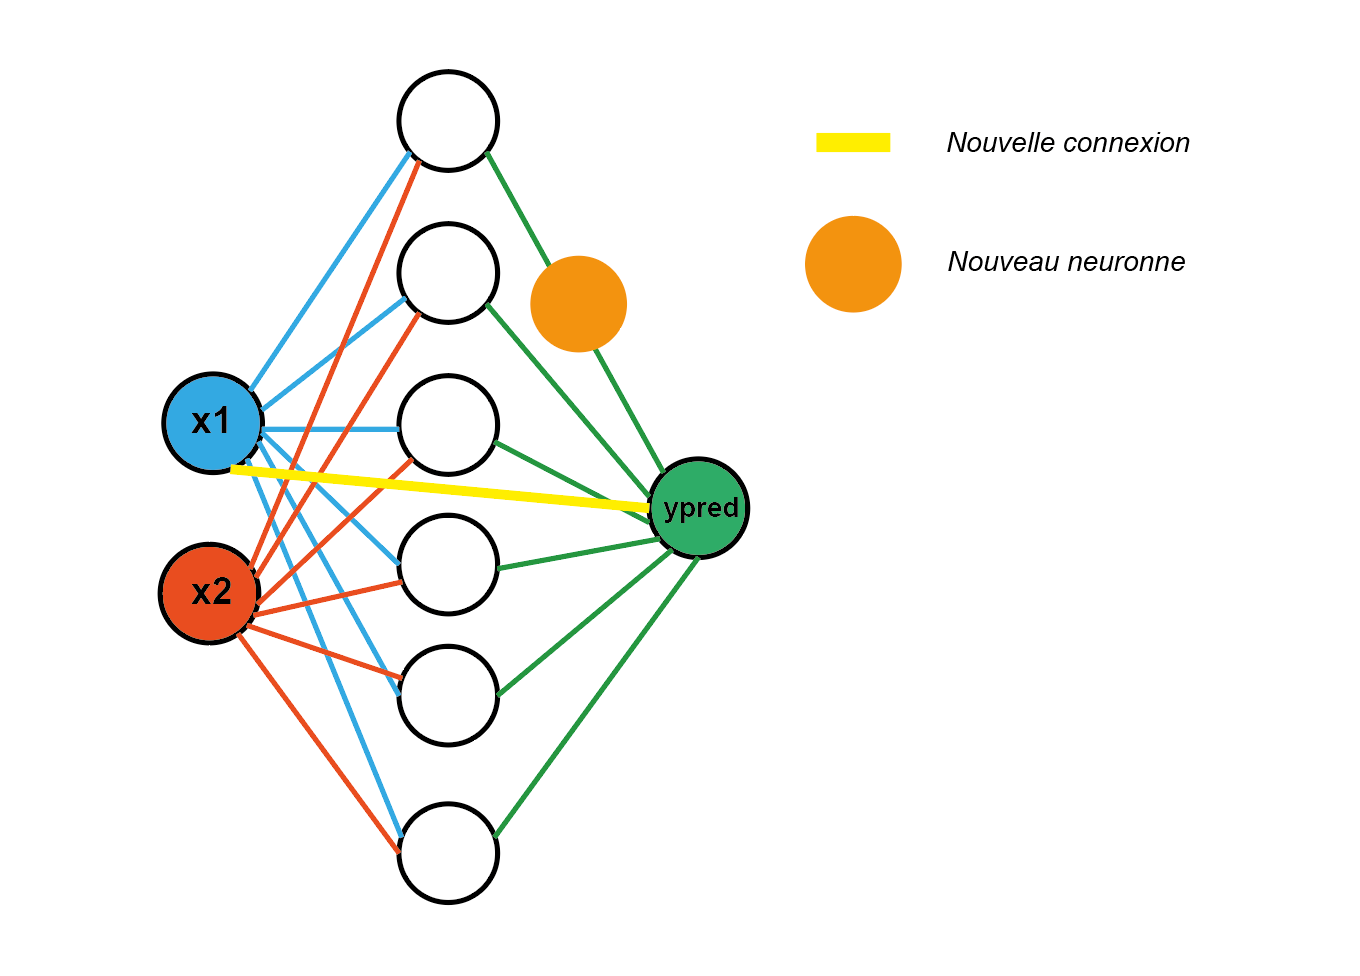

Dans l'implémentation que nous avons faite, nous avons également décidé de faire varier le taux de mutation de la population en fonction du temps. Nous avons pour cela appliqué une fonction cosinus au taux de mutation, modulée par une exponentielle décroissante. Ainsi, il y aura des vagues de mutations très importantes au début de la simulation pour permettre à l'algorithme d'explorer au mieux l'espace des solutions, mais elles s'atténueront au cours du temps afin de lui permettre de converger vers l'extremum absolu de la fonction à optimiser$\,^3$.

# II) Algorithme

Nous présentons ici l'algorithme développé pour résoudre numériquement le problème d'optimisation. Ce code utilise le fichier ``neatV1.py`` fourni avec le carnet jupyter. Il a également besoin du répertoire ``resource``.

In [ ]:
import sys, pygame, math
import random
import gc
import neatV1 

pygame.init()

size = width, height = 350, 800 #previously width was 800
neatV1.HEIGHT = height
speed = [2, 2]

rlength = 30
rwidth = 10
vmax = 0.1

black = 0, 0, 0
white = 255, 255, 255
red = 255, 0, 0
green = 0, 255, 0

#init
screen = pygame.display.set_mode(size)

mleft = 50 # marge de gauche
mright = 50 # marge de droite
mbottom = 50 # marge du bas
mtop = 50 # marge du haut

YTOP = mtop
YBOTTOM = height - mbottom - rlength

SCALE_T = 10**(-2)
h0 = 2.5 * (height + mtop - mbottom)
SCALE_pix = (height - mbottom) / h0

delta_mass = -(3000) #kg/s
fuel_mass = 1e5
dry_mass = 120000 #kg
rocket_mass = dry_mass + fuel_mass
v_exhaust = -3*3280 * SCALE_T #(m/s)
vy_rocket = 0 #(m/s)
gravity = 9.8 * SCALE_T #(m/s^2)
engineON = False

DEAD_ROCKET = []
GENERATION_COUNT = 200
neatV1.GENERATION_COUNT = GENERATION_COUNT
generations_left = GENERATION_COUNT
POPULATION_SIZE = 100
ROCKET_AGENTS = []
TIME_ELAPSED = 0
CAMPER_REMOVAL = 40 / SCALE_T

T = (v_exhaust * delta_mass)
fourchette_min = 0

run = True

class Rocket:
    def __init__(self):
        self.rocket = pygame.transform.scale(pygame.image.load("resource/rocket.png").convert_alpha(), [rwidth, rlength])
        self.x = (width/2)-self.rocket.get_width()/2
        global fourchette_min
        fourchette_min = round((h0/((0.5 * GENERATION_COUNT)))*(1/(2-(GENERATION_COUNT-generations_left)/GENERATION_COUNT)))
        self.y = h0 - random.randint(0, fourchette_min)
        self.y_last = self.y
        self.rect = self.rocket.get_rect()
        self.rect.x = self.x
        self.rect.y = height - self.y * SCALE_pix
        self.vx_rocket = 0
        self.vy_rocket = 0
        self.fuel_left = fuel_mass
        self.camper = 0
        self.remove = False

Algo = neatV1.Neat(POPULATION_SIZE,GENERATION_COUNT)

Algo.init_first_generation()

ROCKET_AGENTS = [None] * POPULATION_SIZE
for i in range(POPULATION_SIZE):
    ROCKET_AGENTS[i] = Rocket()


while run and generations_left:
  
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            run = False

    screen.fill("black")
    TIME_ELAPSED += 1

    for i in range(POPULATION_SIZE):
        if i not in DEAD_ROCKET:
            engineON = Algo.agents[i].getOutput(ROCKET_AGENTS[i].vy_rocket,ROCKET_AGENTS[i].y)

            if ROCKET_AGENTS[i].y == ROCKET_AGENTS[i].y_last:
                ROCKET_AGENTS[i].camper += 1
            else:
                ROCKET_AGENTS[i].y_last = ROCKET_AGENTS[i].y
                ROCKET_AGENTS[i].camper = 0
            if ROCKET_AGENTS[i].camper >= CAMPER_REMOVAL:
                ROCKET_AGENTS[i].remove = True
            if (engineON and ROCKET_AGENTS[i].fuel_left > abs(delta_mass)) or ROCKET_AGENTS[i].remove:
                ROCKET_AGENTS[i].vy_rocket = ROCKET_AGENTS[i].vy_rocket -T/ROCKET_AGENTS[i].fuel_left + gravity
                ROCKET_AGENTS[i].fuel_left += delta_mass * SCALE_T
            else: 
                ROCKET_AGENTS[i].vy_rocket += gravity

            screen.blit(ROCKET_AGENTS[i].rocket, ROCKET_AGENTS[i].rect)
            pygame.draw.line(screen, white, (mleft, mtop), (mleft, height - mbottom))
            pygame.draw.line(screen, white, (mleft, height - mbottom), (width - mright, height - mbottom))

            if ROCKET_AGENTS[i].rect.y <= YBOTTOM and ROCKET_AGENTS[i].rect.y >= 0 and ROCKET_AGENTS[i].fuel_left > 0:
                ROCKET_AGENTS[i].rect = ROCKET_AGENTS[i].rect.move(ROCKET_AGENTS[i].vx_rocket,ROCKET_AGENTS[i].vy_rocket * SCALE_pix)
                Algo.agents[i].y =(YBOTTOM - ROCKET_AGENTS[i].rect.y + rlength) / SCALE_pix
                ROCKET_AGENTS[i].y = Algo.agents[i].y
                if Algo.agents[i].y < Algo.agents[i].y_min:
                    Algo.agents[i].y_min = Algo.agents[i].y
            
            else:
                DEAD_ROCKET.append(i)
                Algo.agents[i].v_final = math.sqrt((ROCKET_AGENTS[i].vx_rocket)**2 + (ROCKET_AGENTS[i].vy_rocket)**2)
                if (YBOTTOM - ROCKET_AGENTS[i].rect.y < 0):
                    Algo.agents[i].y = 0
                    Algo.agents[i].distance = 0
                else:
                    Algo.agents[i].y = YBOTTOM - ROCKET_AGENTS[i].rect.y
                    Algo.agents[i].distance = YBOTTOM - ROCKET_AGENTS[i].rect.y - rlength
                Algo.agents[i].fuel_left = ROCKET_AGENTS[i].fuel_left


    if len(DEAD_ROCKET) == POPULATION_SIZE:
        print("GENERATION : ", (GENERATION_COUNT - generations_left + 1))
        generations_left -= 1
        neatV1.t += 1
        if generations_left == 1:
            Algo.stop_generation(True)
        else:
            Algo.stop_generation()
        DEAD_ROCKET = []
        TIME_ELAPSED = 0
        ROCKET_AGENTS = [None] * POPULATION_SIZE
        for i in range(POPULATION_SIZE):
            ROCKET_AGENTS[i] = Rocket()
        print("Conditions initiales : hmax =", h0, "hmin =", h0 - fourchette_min)
    pygame.display.flip()
    
pygame.quit()
gc.collect()
globals().clear()

Cette seconde partie de code est le contenu du fichier neatV1.py, livré avec le carnet jupyter. Elle est présente pour démonstration seulement et n'est pas exécutée.

In [ ]:
import random 
import math
from itertools import combinations
import numpy as np

SELECTION_SIZE = 17
STAGNATION = 5
PRESERVE_NB = 5
NEWBLOOD_SIZE = 1
DISPLAY_SCORES = 25
# CH nb must be par
CHROMOSOMES_LAYER_WIDTH = 10
CHROMOSOMES_LAYER_NB = 3
MAX_MUTATION_RATE = 0.99 # ratio
MAX_MUTATIONS = 10 # ratio
V_MAX_TOUCHDOWN = 0.1 # m/s
HEIGHT = 0
t = 0
current_id = 0
GENERATION_COUNT = 0
best_score = 0
last_best_score = 0
best_score_count = 0

class Genome:
    def __init__(self,agents,fitnessArr,POPULATION_SIZE):
        self.newGeneration = []
        self.POPULATION_SIZE = POPULATION_SIZE
        self.mutation_rate = math.exp(-t/GENERATION_COUNT) * abs(math.cos(t/2)) * MAX_MUTATION_RATE
        print("Current mutation rate:", self.mutation_rate)
        self.selection(agents,fitnessArr)
        self.crossover(agents)
        self.mutate()

    def selection(self,agents,fitnessArr):
        global best_score_count
        global STAGNATION
        if best_score_count < STAGNATION:
            print("Selecting the", SELECTION_SIZE, "best rockets for breeding")
            for i in range(len(fitnessArr)):
                self.newGeneration.append(agents[fitnessArr[i][0]])
            print("Adding", NEWBLOOD_SIZE, "brand new rockets to the breeding pool")
            for i in range(NEWBLOOD_SIZE):
                self.newGeneration.append(AI())
        else:
            print("Stagnation: kill all but the very best and bring in fresh blood")
            for i in range(PRESERVE_NB):
                self.newGeneration.append(agents[fitnessArr[i][0]])
            print("Adding", self.POPULATION_SIZE - PRESERVE_NB, "brand new rockets to the breeding pool")
            for i in range(self.POPULATION_SIZE - PRESERVE_NB):
                self.newGeneration.append(AI())

    def reproduce(self, parent1, parent2):
        newAI = AI()
        for i in range(CHROMOSOMES_LAYER_NB):
            for j in range(CHROMOSOMES_LAYER_WIDTH):
                if random.uniform(0,1) > 0.5:
                    newAI.weights[i][j] = parent1.weights[i][j]
                else:
                    newAI.weights[i][j] = parent2.weights[i][j]
        self.newGeneration.append(newAI)

    def crossover(self,agents):
        global best_score_count
        global STAGNATION
        if best_score_count < STAGNATION:
            pairs = list(combinations(self.newGeneration, 2))
            for z in range(round(len(pairs) / 2)):
                self.reproduce(pairs[z][0],pairs[z][1])
            print("Adding", self.POPULATION_SIZE - len(self.newGeneration), "brand new rockets to total population")
            for i in range(self.POPULATION_SIZE - len(self.newGeneration)):
                self.newGeneration.append(AI())
        else:
            best_score_count = 0

    def mutate(self):
        newgen_mutations = 0
        for i in range(PRESERVE_NB, len(self.newGeneration)):
            if random.uniform(0,1) <= self.mutation_rate:
                newgen_mutations += 1
                nb = random.randint(1,MAX_MUTATIONS)
                for j in range(nb):
                    layer = random.randint(0,CHROMOSOMES_LAYER_NB - 1)
                    idx = random.randint(0,CHROMOSOMES_LAYER_WIDTH - 1)
                    if layer == 0 :
                        nw1 = (self.newGeneration[i].weights[0][idx][0]+random.uniform(-1,1))/2
                        nw2 = (self.newGeneration[i].weights[0][idx][1]+random.uniform(-1,1))/2
                        self.newGeneration[i].weights[0][idx] = [nw1,nw2]
                    else:
                        nw = (self.newGeneration[i].weights[layer][idx]+random.uniform(-1,1))/2
                        self.newGeneration[i].weights[layer][idx] = nw
        print(newgen_mutations, "rockets have received random mutations")
class AI:
    def __init__(self,weights = False):
        self.output = False
        self.x = 0
        self.y = 0
        self.y_min = HEIGHT
        self.distance = HEIGHT
        self.v_final = 0
        self.rocket_mass = 0
        self.fuel_left = 0
        global current_id
        self.id = current_id
        current_id += 1
        self.transit_neurone_value = [None] * CHROMOSOMES_LAYER_WIDTH
        if weights :
            self.weights = weights
        else:
            self.weights = self.genWeights()

    def genWeights(self):
        arr = []
        tmp_arr = []
        for j in range(CHROMOSOMES_LAYER_WIDTH):
            tmp_arr.append([random.uniform(-1,1),random.uniform(-1,1)])
        arr.append(tmp_arr)
        for i in range(1, CHROMOSOMES_LAYER_NB):
            tmp_arr2 = []
            for j in range(CHROMOSOMES_LAYER_WIDTH):
                tmp_arr2.append(random.uniform(-1,1),)
            arr.append(tmp_arr2)
        return arr

    def getOutput(self,input1,input2):
        output = 0
        for i in range(CHROMOSOMES_LAYER_WIDTH):
            self.transit_neurone_value[i] = self.sigmoid(self.weights[0][i][0]*float(input1)) + self.sigmoid(self.weights[0][i][1]*float(input2))
        for i in range(1, CHROMOSOMES_LAYER_NB-1):
            interm = np.sum(self.transit_neurone_value)
            for j in range(CHROMOSOMES_LAYER_WIDTH):
                self.transit_neurone_value[j] = self.sigmoid(interm * float(self.weights[i][j]))
        for i in range(CHROMOSOMES_LAYER_WIDTH):
            output += self.weights[-1][i] * self.transit_neurone_value[i]

        self.output = self.sigmoid(output) > 0.5
        return self.output

    def sigmoid(self,input):
        if input < 0:
            return 1 - 1/(1 + math.exp(input))
        else:
            return 1/(1 + math.exp(-input))

    def fitnessCalc(self):
        if self.y <= 0:
            if self.v_final >= V_MAX_TOUCHDOWN:
                return 1/self.v_final
            else:
                return self.fuel_left*1e-3
        else:
            if self.y_min == 0:
                return self.fuel_left*1e-5
            else:
                return 1 / self.y_min

class Neat:
    def __init__(self,POPULATION_SIZE,GENERATION_COUNT):
        self.GENERATION_COUNT = GENERATION_COUNT
        self.POPULATION_SIZE = POPULATION_SIZE
        self.agents = []
        self.fitnessArr = []
        self.BestAgent = AI() 
    
    def init_first_generation(self):
        for i in range(self.POPULATION_SIZE):
            self.agents.append(AI())
        

    def stop_generation(self,signal = False):
        global best_score
        global last_best_score
        global best_score_count

        for i in range(len(self.agents)):
            self.fitnessArr.append((i,
                                    self.agents[i].fitnessCalc(),
                                    "id: " + str(self.agents[i].id),
                                    "vfinal: " + str(round(self.agents[i].v_final, 2)),
                                    "hfinal: " + str(round(self.agents[i].distance, 2)),
                                    "fleft: " + str(round(self.agents[i].fuel_left))))

        self.fitnessArr.sort(reverse=True, key = lambda x: x[1])

        genome = Genome(self.agents,self.fitnessArr[:SELECTION_SIZE], self.POPULATION_SIZE)

        if self.fitnessArr[0][1] == best_score and self.fitnessArr[PRESERVE_NB][1] == last_best_score:
            best_score_count += 1
            print("best scores", best_score, "and", last_best_score, "occured", best_score_count, "times")
        else:
            best_score = self.fitnessArr[0][1]
            last_best_score = self.fitnessArr[PRESERVE_NB - 1][1]
            best_score_count = 0
            print("resetting best score", best_score)

        print(DISPLAY_SCORES, "best scores:")
        for i in range(DISPLAY_SCORES):
            print(self.fitnessArr[i])

        if not signal:
            self.agents = genome.newGeneration
        else:
            best = self.agents[self.fitnessArr[-1][0]]
            self.agents = []
            for i in range(self.POPULATION_SIZE):
                self.agents.append(best)
            print(best.v_final,"m/s vitesse finale")
            print(best.distance,"m altitude finale")

        self.fitnessArr = []

# III) Résultats et discussion

Nous allons à présent nous intéresser aux résultats de cette expérience.
Pour obtenir nos données nous l’avons laissé tourner pendant 50 générations afin d’obtenir une fusée présentant des résultats suffisamment intéressants pour être analysés. Nous avons donc lancé la simulation et récupéré les poids associés à la meilleure IA de la 50ème génération.
Elle est disponible sous le nom de winner.csv à des fins de démonstration.

Mais plus intéressant pour cette partie, nous avons récupéré, à la fin de chaque génération les score/fitness des 10 meilleures IA. Prendre uniquement la dernière n’aurait pas été intéressant car soumis à trop de variabilité.
Nous en avons donc fait la moyenne et stocké le résultat au cours de l’entraînement afin de pouvoir suivre l’évolution de celui-ci. Nous avons ensuite réitéré cette opération pour différents scénarios qui seront présentés par la suite.

## Cas 1 : Les fusées décident d’allumer leur booster aléatoirement

Il est intéressant de commencer par un modèle « bête » pour évaluer la performance du nôtre et son intérêt. À chaque tour de boucle, toute les fusée décide d’allumer leur booster avec une probabilité de 0.5 générer à l’aide de la fonction ``random.random()``. On laisse tourner l’entraînement et on obtient : 

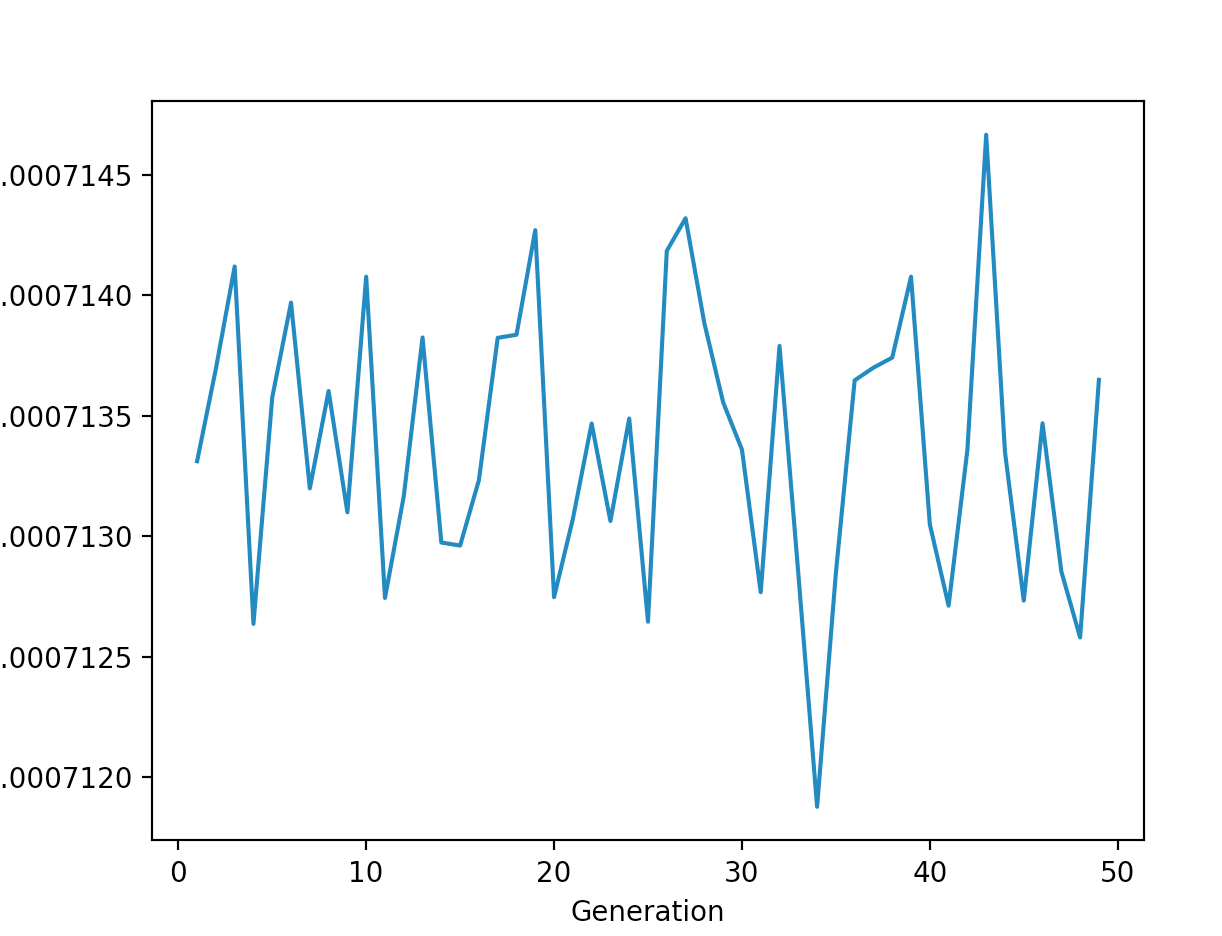

On peut constater une très mauvaise performance.

## Cas 2 : Modèle basé sur un réseau de neurones et un algorithme génétique sans mutation

La discussion que l’on a eue plus tôt va pouvoir être illustrée :

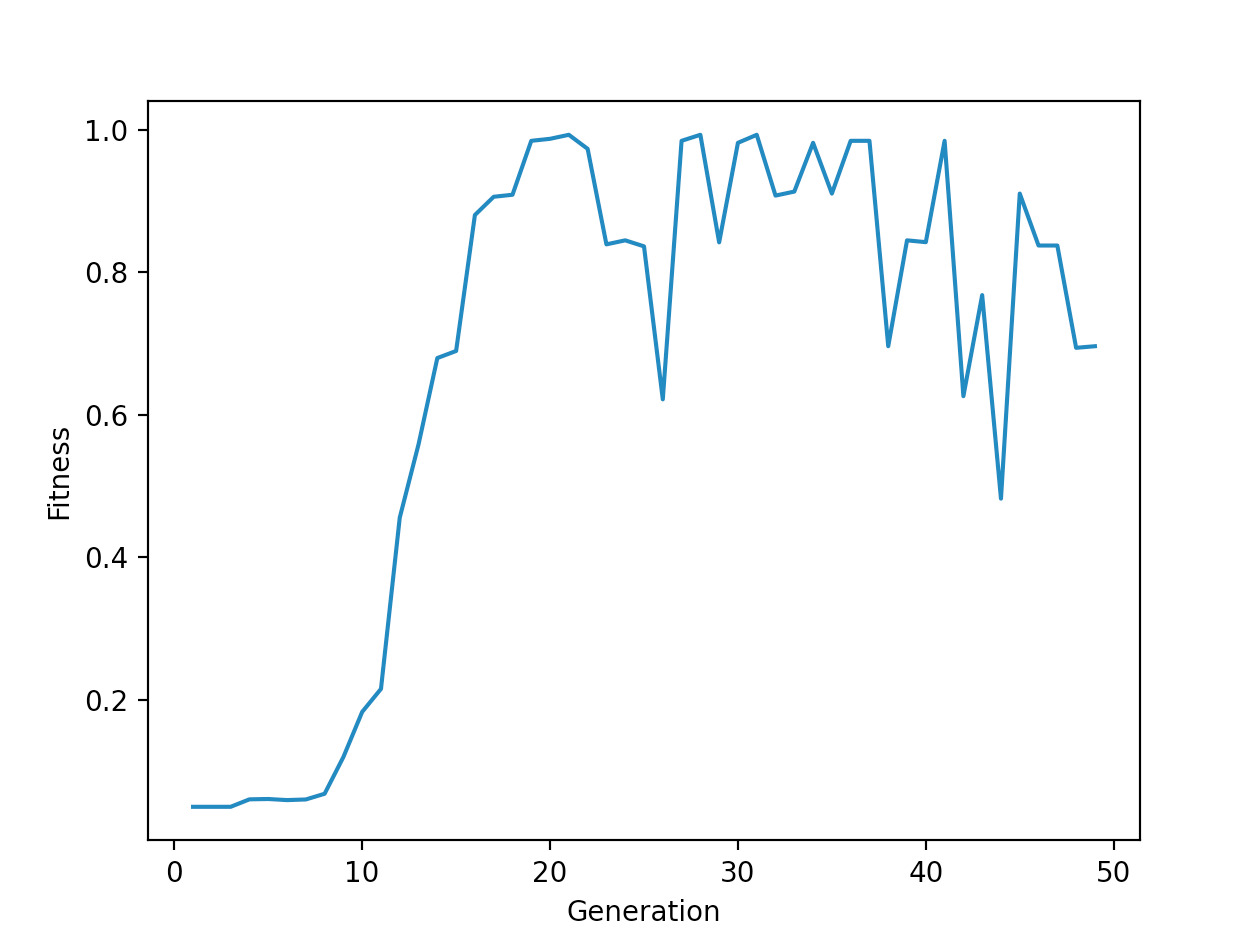

On constate ici une nette amélioration des performances de notre modèle avec un score qui oscille autour de 1 soit un facteur d’amélioration de l’ordre 10^3 par rapport à ce que nous avons pu noter pour le modèle précédent dans les meilleures conditions.

Plus intéressant à observer, on peut voir une tendance à la stagnation sur notre graphique qui se vérifie si l’entraînement se poursuit. Ce phénomène a été abordé en amont de cette partie mais mérite un approfondissement. Une première intuition sur ce phénomène serait que la progéniture générée au cours de chaque itération est une « copie » un peu altérée des générations précédentes. Autrement dit l’algorithme atteint un seuil où, compte tenu du pool de poids qu’il a à disposition, il n’est plus capable d’offrir une meilleure performance même s’il possède différentes combinaisons de ces poids à sa disposition.

Un parallèle intéressant de ce phénomène se retrouve en Machine Learning et peut être illustré par ce graphique :  

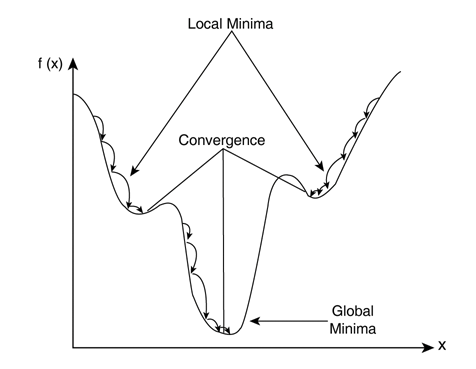

Notre modèle, comme nous l’avons dit, commence avec un pool de poids/paramètres qu’il peut changer entre chaque génération afin d’obtenir des performances meilleures. Le problème est que ce pool étant généré aléatoirement via la fonction  « getWeights » rien ne dit que ces poids se situent dans la « zone idéale », ou plutôt la zone où notre algorithme à juste à travailler l’emploi de ces poids pour trouver la solution optimum. 

Pour reprendre le graphique il illustre une fonction de perte en ordonnée et x un poids quelconque. Les flèches quant à elle sont le gradient calculé. On distingue une situation où un gradient associé à des changements trop petits des poids que nous cherchons à optimiser peut nous conduire tout droit vers une situation sous-optimale, soit un minimum local, et surtout nous y piéger. Dans cette configuration une personne observera au cours de son entraînement que son modèle stagne et que les performances ne s’améliorent plus.

Pour résoudre ce problème, une technique répandue dans le monde du Machine Learning est l’emploi de ce qu’on appelle un « Learning rate ». L’équivalent pour notre algorithme est l’introduction des mutations. 

Les introduire permet à notre modèle non seulement de permettre au meilleur de se reproduire, mais aussi la possibilité de nouvelles combinaisons, qui peuvent mener à de meilleures performances et surtout permettre à notre modèle de continuer à apprendre. 

L’illustration finale en est la démonstration : 

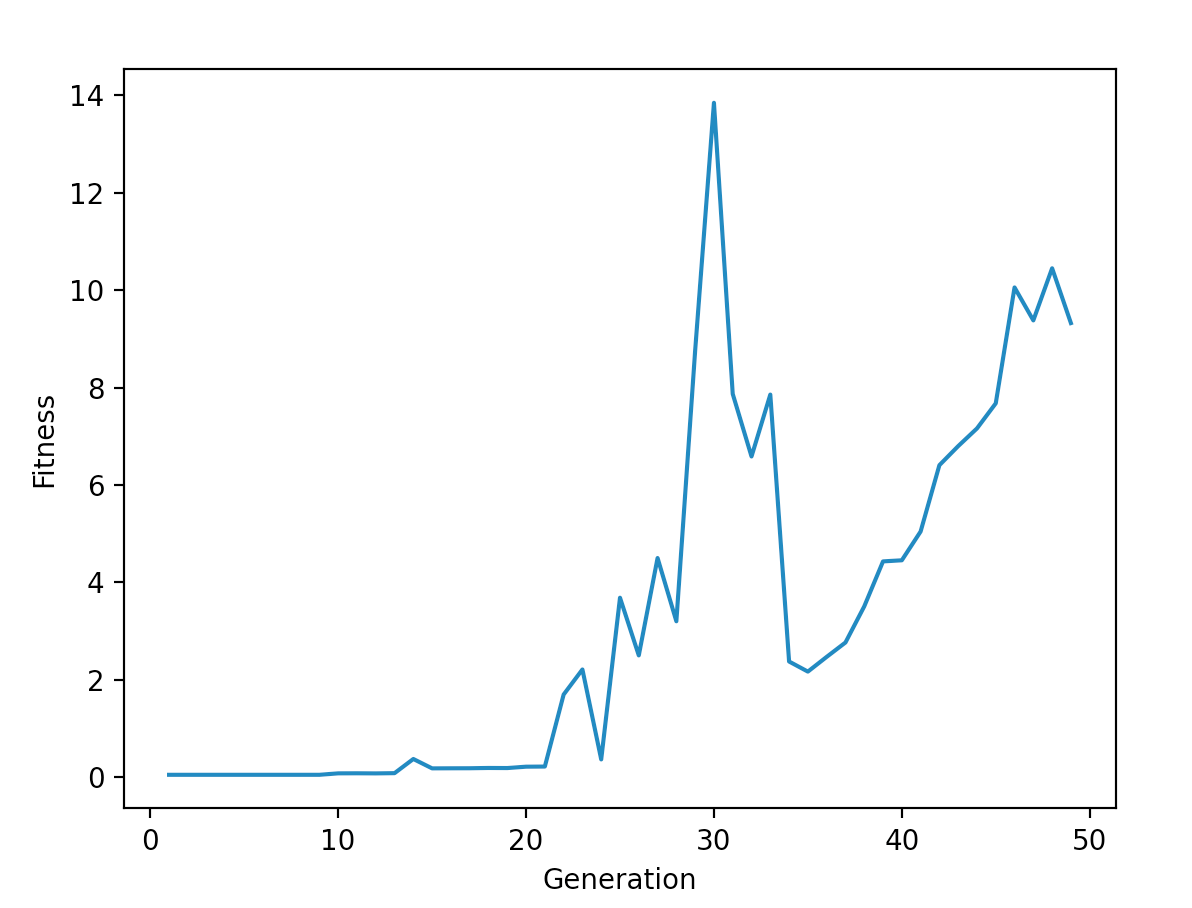

# Conclusion

Nous voyons lorsqu'on lance le programme que l'algorithme converge bien vers une solution optimisant l'usage de carburant. En effet, lorsque l'algorithme converge, il arrive que certaines fusées touchent le sol à une vitesse plus faible que les autres tout en ayant davantage de carburant. Cela peut se constater dans les traces de l'algorithme d'apprentissage.

On pourrait penser que les fusées arrivant au sol plus lentement ont davantage freiné leur chute et donc dépensé davantage de carburant que les autres mais ce n'est pas toujours le cas. Cela veut dire qu'il y a bien une sorte d'échange entre vitesse finale et quantité de carburant finale.

# Bibliographie

[1] **Guidance and Control for Launch and Vertical Descend of Reusable Launchers using Model Predictive Control and Convex Optimisation**, Guillermo Zaragoza Prous, Luleå University of Technology, Department of Computer Science, Electrical and Space Engineering, 2020

[2] **Dynamic Optimization in Python: Rocket Soft Landing**, Shvab, https://medium.com/analytics-vidhya/dynamic-optimization-in-python-rocket-soft-landing-a5a68eaf3b94

[3] **Setting the learning rate of your neural network**, Jordan, https://www.jeremyjordan.me/nn-learning-rate/

**A logical calculus of ideas immanent in nervous activity**, McCulloch and Pitts, University of Illinois,  https://www.cs.cmu.edu/~./epxing/Class/10715/reading/McCulloch.and.Pitts.pdf

Stanford, http://nifty.stanford.edu/2021/de-freitas-weingart-rocket-simulator/tutorials/index.html

Understanding the impact of learning rate https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/

Genetic Random Weight Change Algorithm for the Learning of Multilayer Neural Networks https://arxiv.org/abs/1906.01892

Genetic Algorithm https://en.wikipedia.org/wiki/Genetic_algorithm

Molecular Biology of the Cell https://www.academia.edu/44422678/THE_CELL_Molecular_Biology_of_Sixth_Edition

Soft landing rocket https://jckantor.github.io/CBE30338/07.02-Soft-Landing-a-Rocket.html

2D translation example http://nifty.stanford.edu/2021/de-freitas-weingart-rocket-simulator/

Explained Neural Networks https://news.mit.edu/2017/explained-neural-networks-deep-learning-0414

What is a genetic algorithm https://www.mathworks.com/help/gads/what-is-the-genetic-algorithm.html#:~:text=The%20genetic%20algorithm%20is%20a,a%20population%20of%20individual%20solutions.

Genetic Algorithm a overview https://www.sciencedirect.com/topics/engineering/genetic-algorithm

Genetic Algorithm https://www.geeksforgeeks.org/genetic-algorithms/

What are neural network https://www.ibm.com/cloud/learn/neural-networks